**Import relevant libraries**



In [ ]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



**Mount the GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change the current working directory**

In [ ]:
os.chdir("/content/drive/My Drive/mini_project1")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/14r0ExMiz520EwtoGB3BU5ZY3vwOU2shf/mini_project1'

**Load the Image and display**

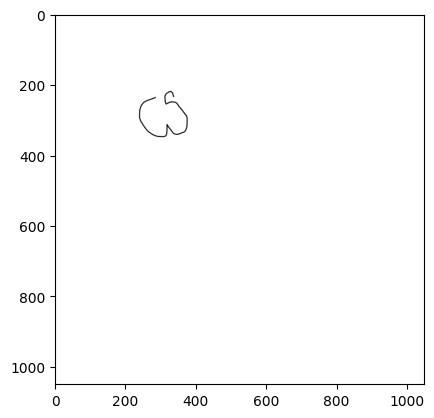

In [ ]:
img =image.load_img("/content/drive/My Drive/mini_project1/testing/1.jpeg")
plt.imshow(img)

In [ ]:
cv2.imread("training/ya/1.jpeg").shape

(1050, 1050, 3)

**Create an ImageDataGenerator for training data and testing data with pixel value rescaling**

In [ ]:
train= ImageDataGenerator(rescale =1/255)
test= ImageDataGenerator(rescale =1/255)

train_dataset= train.flow_from_directory('training/',
                                          target_size=(700,700),
                                          batch_size=3,
                                          class_mode='binary')
test_dataset= test.flow_from_directory('testing/',
                                          target_size=(700,700),
                                          batch_size=3,
                                          class_mode='binary')

Found 80 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


**See the labels**

In [ ]:
train_dataset.class_indices

{'ta': 0, 'ya': 1}

**Retrieve the array of class indices for each sample in the training dataset**

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Define sequential model**

In [ ]:
model=Sequential([Conv2D(16,(3,3),activation='relu', input_shape=(700,700,3)),
                  MaxPooling2D((2,2)),

                  Conv2D(32,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),

                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D((2,2)),

                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
                  ])

**Compile the model with binary crossentropy loss, adam optimizer, and accuracy metric**

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Train the model**

In [ ]:
model_fit = model.fit(train_dataset,
          steps_per_epoch=5,
          epochs=30)

Epoch 1/30
5/5 [==============================] - 10s 559ms/step - loss: 59.6896 - accuracy: 0.4667
Epoch 2/30
5/5 [==============================] - 3s 793ms/step - loss: 4.0554 - accuracy: 0.4000
Epoch 3/30
5/5 [==============================] - 3s 632ms/step - loss: 1.9378 - accuracy: 0.4667
Epoch 4/30
5/5 [==============================] - 3s 645ms/step - loss: 0.6632 - accuracy: 0.6429
Epoch 5/30
5/5 [==============================] - 2s 454ms/step - loss: 0.7074 - accuracy: 0.7143
Epoch 6/30
5/5 [==============================] - 2s 368ms/step - loss: 1.0220 - accuracy: 0.5333
Epoch 7/30
5/5 [==============================] - 1s 299ms/step - loss: 0.6508 - accuracy: 0.5000
Epoch 8/30
5/5 [==============================] - 2s 414ms/step - loss: 0.4753 - accuracy: 0.7333
Epoch 9/30
5/5 [==============================] - 1s 134ms/step - loss: 0.4853 - accuracy: 0.7333
Epoch 10/30
5/5 [==============================] - 1s 89ms/step - loss: 0.4880 - accuracy: 0.8571
Epoch 11/30
5/5 [=

**Testing Sample Data**

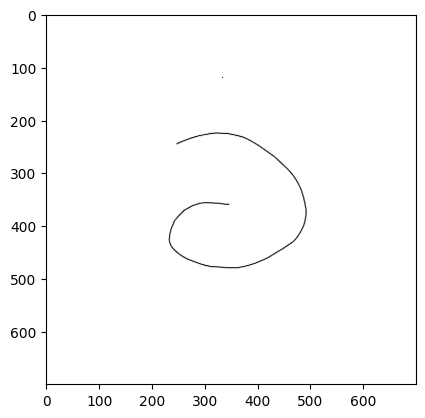

1/1 [==============================] - 0s 31ms/step
This is Ta


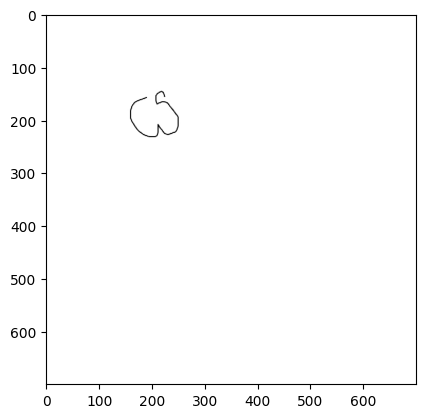

1/1 [==============================] - 0s 72ms/step
This is Ya


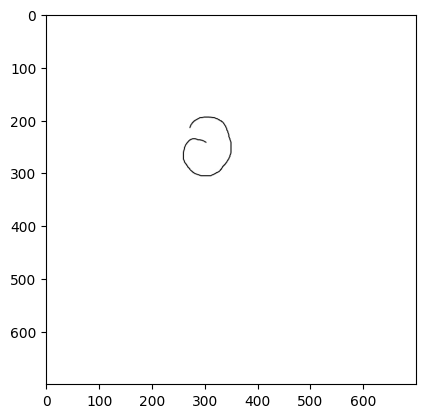

1/1 [==============================] - 0s 103ms/step
This is Ta


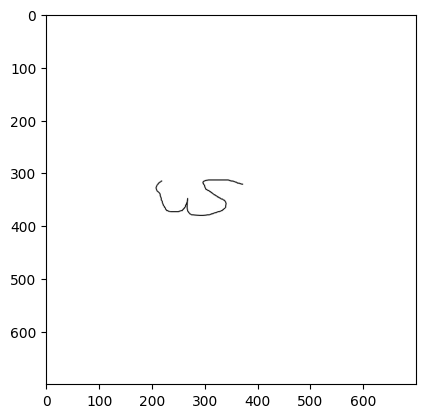

1/1 [==============================] - 0s 20ms/step
This is Ya


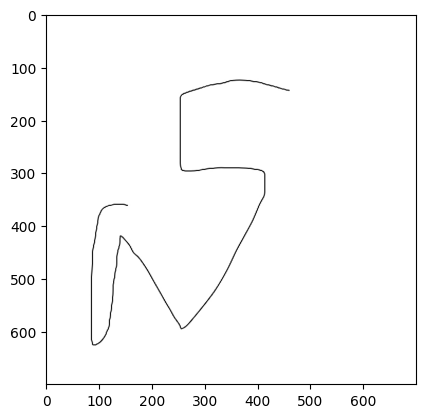

1/1 [==============================] - 0s 19ms/step
This is Ya


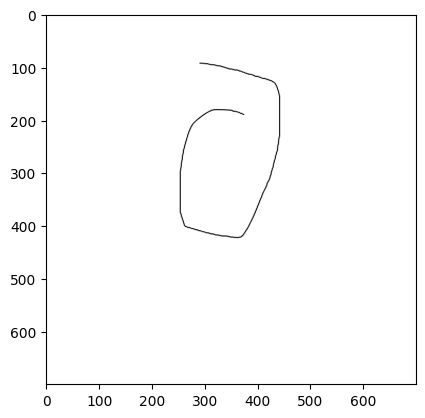

1/1 [==============================] - 0s 23ms/step
This is Ta


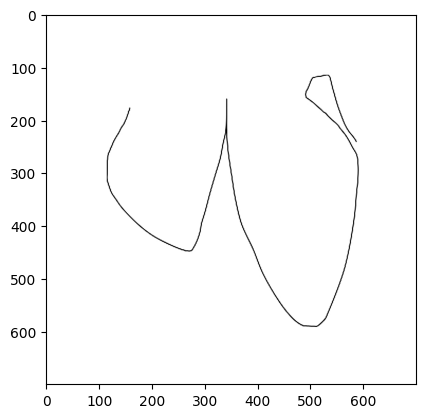

1/1 [==============================] - 0s 20ms/step
This is Ya


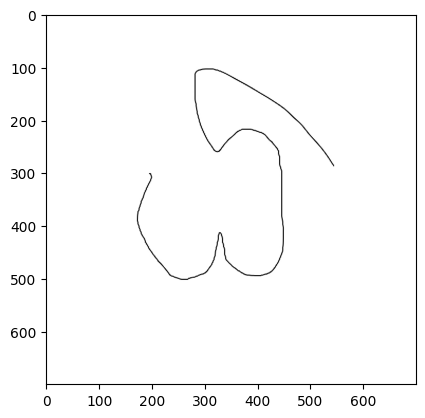

1/1 [==============================] - 0s 22ms/step
This is Ya


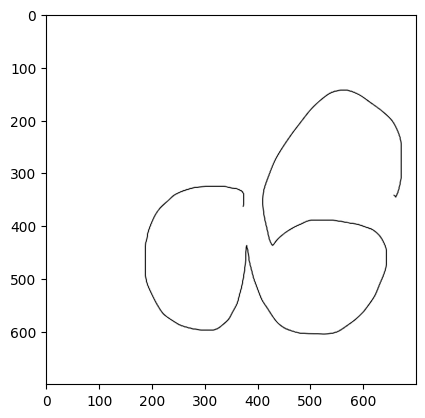

1/1 [==============================] - 0s 21ms/step
This is Ta


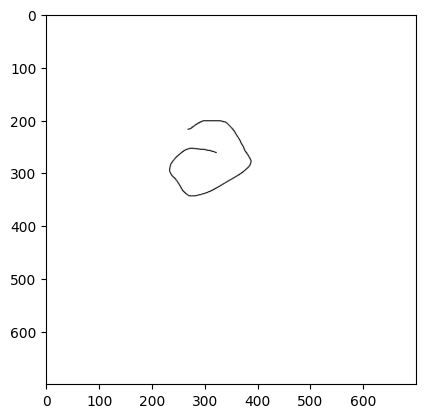

1/1 [==============================] - 0s 19ms/step
This is Ya


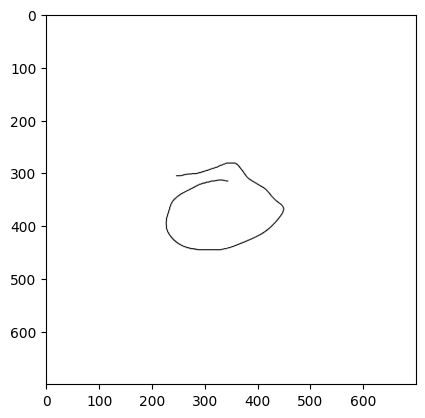

1/1 [==============================] - 0s 20ms/step
This is Ta


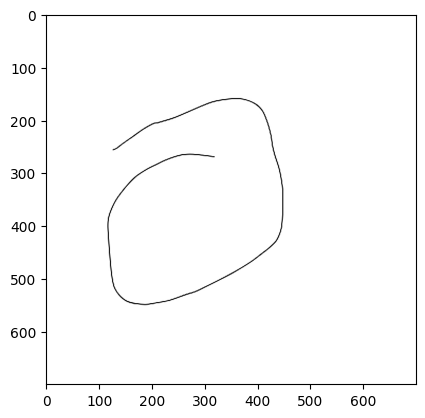

1/1 [==============================] - 0s 19ms/step
This is Ya


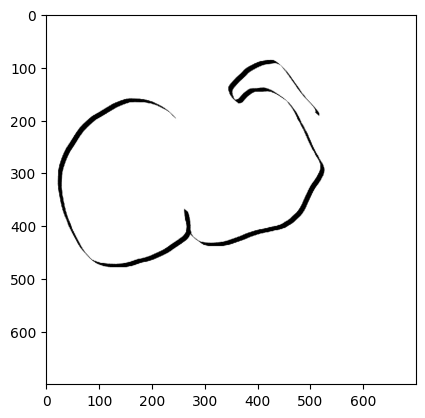

1/1 [==============================] - 0s 19ms/step
This is Ta


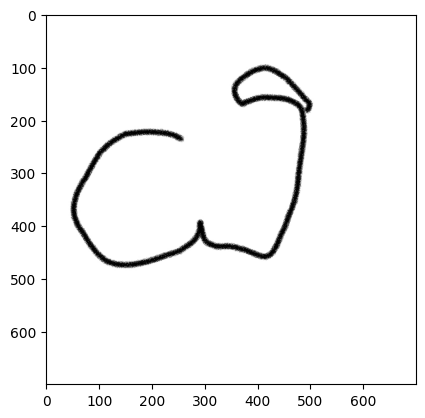

1/1 [==============================] - 0s 19ms/step
This is Ya


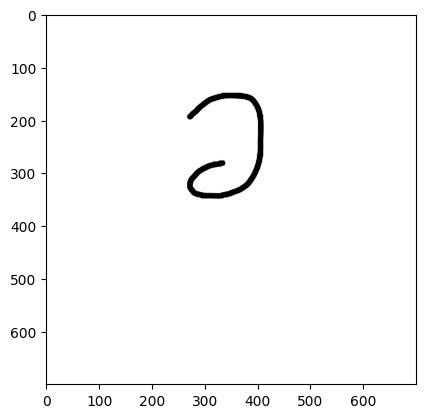

1/1 [==============================] - 0s 20ms/step
This is Ta


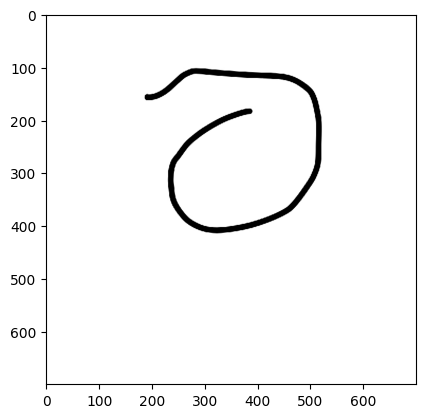

1/1 [==============================] - 0s 22ms/step
This is Ta


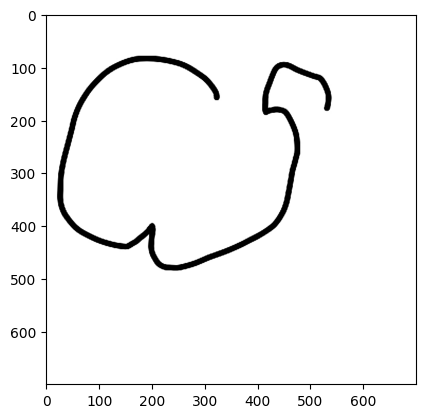

1/1 [==============================] - 0s 20ms/step
This is Ya


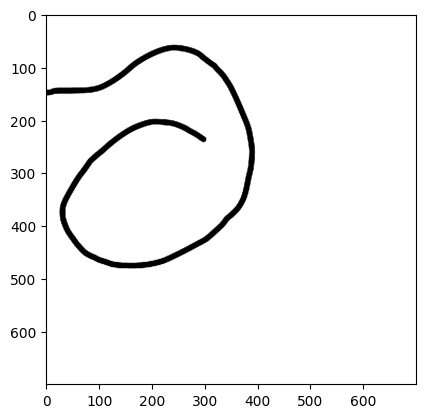

1/1 [==============================] - 0s 19ms/step
This is Ya


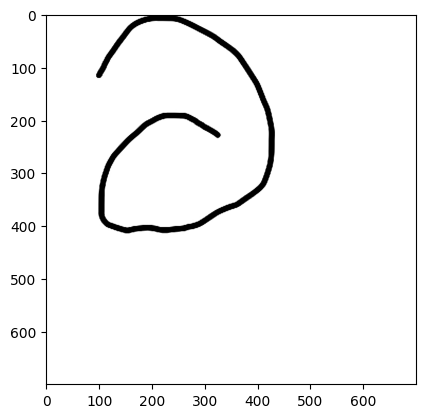

1/1 [==============================] - 0s 20ms/step
This is Ya


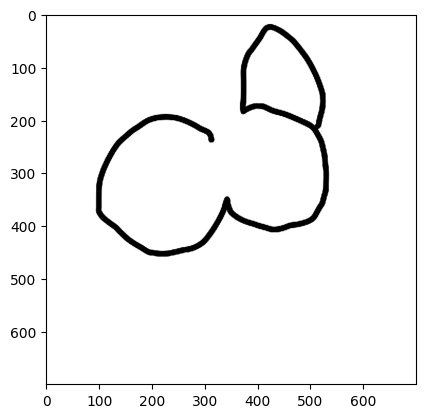

1/1 [==============================] - 0s 20ms/step
This is Ya


In [ ]:
# Directory path containing the testing images

dir_path='testing/'

for i in os.listdir(dir_path):
  img=image.load_img(dir_path+i,target_size=(700,700))
  plt.imshow(img)
  plt.show()

  # Convert the image to a NumPy array and add an extra dimension
  X= image.img_to_array(img)
  X=np.expand_dims(X,axis=0)

  # Stack the array vertically to create a batch of images
  images=np.vstack([X])

  # Make a prediction using the trained model
  val = model.predict(images)

  # Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Ta")
  else:
    print("This is Ya")